# PROBLEM STATEMENT :

### The data contains power for multiple ACs at some hotel in Gurgaon.

### 1.Identify patterns/trends in the data?

### 2.Which AC was used the most/least?

### 3.Relate this power data with the outside temperature of Gurgaon. (Feel free to use temperature data from any website online. How will you fetch that data in your analysis?

### 4.Using the power data, predict/forecast the power consumption?

# INSIGHTS FROM THE PROBLEM STATEMENT :

### Location of Hotel: Gurgaon

### No.of Hotels : 01


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Now lets import the data set which is in the form of CSV as a DataFrame.

AC_Data_Raw_DF = pd.read_csv('C:/Users/SREEKAR7278/Desktop/AC_Data_Saranya Data set Zentiax Assignment.csv')


# Lets view our raw DataFrame.

AC_Data_Raw_DF


,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,01-08-2019 00:00,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,01-08-2019 00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-08-2019 00:02,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,01-08-2019 00:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-08-2019 00:04,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87835,30-09-2019 23:55,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989
87836,30-09-2019 23:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87837,30-09-2019 23:57,1.209176,6.152532,2.211421,0.000000,1.448103,0.000000,3.151248,2.871690,3.417942,2.185493,5.174168,2.772349,3.786657,2.060023,4.057525,1.870886,2.991946,7.134647
87838,30-09-2019 23:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Lets name the index column and rename the O column.
AC_Data_Raw_DF.index.name = 'S.No'
AC_Data_Raw_DF.rename({'0':'Date and Time'},axis=1,inplace=True)

AC_Data_Raw_DF

,Date and Time,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
S.No,,,,,,,,,,,,,,,,,,,
0,01-08-2019 00:00,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,01-08-2019 00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-08-2019 00:02,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,01-08-2019 00:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-08-2019 00:04,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87835,30-09-2019 23:55,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989
87836,30-09-2019 23:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87837,30-09-2019 23:57,1.209176,6.152532,2.211421,0.000000,1.448103,0.000000,3.151248,2.871690,3.417942,2.185493,5.174168,2.772349,3.786657,2.060023,4.057525,1.870886,2.991946,7.134647


# INITIAL INSIGHTS FROM RAW DATAFRAME :

### No.of Ac's = 18

### Data collection Start Date = 2019-08-01

### Data collection End Date   = 2019-09-30

### No.of Days the Data has been collected = 60 days, 23 hours, 59 minutes and 0 seconds

### Time interval between Data Collection = 1min

In [3]:
#Before proceeding any further lets go a bit deep into our Data Frame information.

AC_Data_Raw_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  87840 non-null  object 
 1   AC 1           43708 non-null  float64
 2   AC 2           43711 non-null  float64
 3   AC 3           43713 non-null  float64
 4   AC 4           43704 non-null  float64
 5   AC 5           43716 non-null  float64
 6   AC 6           43717 non-null  float64
 7   AC 7           43679 non-null  float64
 8   AC 8           43704 non-null  float64
 9   AC 9           43654 non-null  float64
 10  AC 10          43690 non-null  float64
 11  AC 11          43670 non-null  float64
 12  AC 12          43713 non-null  float64
 13  AC 13          43719 non-null  float64
 14  AC 14          43696 non-null  float64
 15  AC 15          43715 non-null  float64
 16  AC 16          43710 non-null  float64
 17  AC 17          43714 non-null  float64
 18  AC 18 

### 1.From the information obtained from df.info() method, we can conclude that more than 50% of our Data   Frame is having empty values.

### 2.Here if we remove the empty values, we will lose more than 50% of our data from DataFrame. This might lead us to improper analysis.

### 3.By carefully observing our raw dataframe, we can notice a pattren in the missing data. In most  cases considering 3 linear elements in any coloum from AC1 to AC18, the middle element value is empty i.e in sample of AC1 1st,2nd & 3rd elements, the 2nd elements value is empty/Nan. Therefore,   here we can use the 'median' concept to find the missing value of 2nd element.

In [4]:
# Lets copy of raw dataframe so that we won't tamper the original.

New_DF = AC_Data_Raw_DF.copy()

# Lets fill the missing values using 'median' concept with the help of .interplote() method.
for col in New_DF.columns:
    New_DF[col] = New_DF[col].interpolate(method='linear',limit_direction='forward')
print(New_DF)

          Date and Time      AC 1      AC 2      AC 3      AC 4      AC 5  \
S.No                                                                        
0      01-08-2019 00:00  7.518632  8.788315  0.000000  0.000000  2.617045   
1      01-08-2019 00:01  7.472373  8.864465  0.000000  0.000000  2.599335   
2      01-08-2019 00:02  7.426114  8.940615  0.000000  0.000000  2.581625   
3      01-08-2019 00:03  7.239550  9.050859  0.000000  0.000000  2.586860   
4      01-08-2019 00:04  7.052986  9.161103  0.000000  0.000000  2.592095   
...                 ...       ...       ...       ...       ...       ...   
87835  30-09-2019 23:55  0.000000  6.122385  2.192198  2.083315  1.046250   
87836  30-09-2019 23:56  0.604588  6.137458  2.201809  1.041657  1.247176   
87837  30-09-2019 23:57  1.209176  6.152532  2.211421  0.000000  1.448103   
87838  30-09-2019 23:58  1.319809  6.115407  2.051292  0.000000  1.512797   
87839  30-09-2019 23:59  1.430442  6.078281  1.891162  0.000000  1.577491   

In [5]:
# Once again, Lets get a bit of info about our new dataframe.
New_DF.info()
New_DF


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  87840 non-null  object 
 1   AC 1           87840 non-null  float64
 2   AC 2           87840 non-null  float64
 3   AC 3           87840 non-null  float64
 4   AC 4           87840 non-null  float64
 5   AC 5           87840 non-null  float64
 6   AC 6           87840 non-null  float64
 7   AC 7           87840 non-null  float64
 8   AC 8           87840 non-null  float64
 9   AC 9           87840 non-null  float64
 10  AC 10          87840 non-null  float64
 11  AC 11          87840 non-null  float64
 12  AC 12          87840 non-null  float64
 13  AC 13          87840 non-null  float64
 14  AC 14          87840 non-null  float64
 15  AC 15          87840 non-null  float64
 16  AC 16          87840 non-null  float64
 17  AC 17          87840 non-null  float64
 18  AC 18 

,Date and Time,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
S.No,,,,,,,,,,,,,,,,,,,
0,01-08-2019 00:00,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,01-08-2019 00:01,7.472373,8.864465,0.000000,0.000000,2.599335,3.930136,2.655821,4.840935,5.285762,2.282977,1.876628,1.189552,3.114025,2.734977,4.360098,4.049972,3.262830,6.557740
2,01-08-2019 00:02,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,01-08-2019 00:03,7.239550,9.050859,0.000000,0.000000,2.586860,3.790679,2.430835,5.689972,4.672429,2.325915,2.756904,2.064570,3.108955,2.698672,3.420724,3.892182,3.176074,6.371487
4,01-08-2019 00:04,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87835,30-09-2019 23:55,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989
87836,30-09-2019 23:56,0.604588,6.137458,2.201809,1.041657,1.247176,0.000000,3.409834,2.939000,3.516121,2.023170,5.096968,2.963285,3.717341,2.249775,4.060122,1.862619,3.009743,7.197318
87837,30-09-2019 23:57,1.209176,6.152532,2.211421,0.000000,1.448103,0.000000,3.151248,2.871690,3.417942,2.185493,5.174168,2.772349,3.786657,2.060023,4.057525,1.870886,2.991946,7.134647


In [6]:
# Looking at the info, we also noticed that our Data type of Date and Time column is in 'object' type, lets convert it into relevant datatype.

New_DF['Date and Time']=pd.to_datetime(New_DF['Date and Time'], format='%d-%m-%Y %H:%M')

In [7]:
New_DF['Date and Time']

S.No
0       2019-08-01 00:00:00
1       2019-08-01 00:01:00
2       2019-08-01 00:02:00
3       2019-08-01 00:03:00
4       2019-08-01 00:04:00
                ...        
87835   2019-09-30 23:55:00
87836   2019-09-30 23:56:00
87837   2019-09-30 23:57:00
87838   2019-09-30 23:58:00
87839   2019-09-30 23:59:00
Name: Date and Time, Length: 87840, dtype: datetime64[ns]

In [8]:
DailyData = New_DF.resample('1D', on='Date and Time').mean()
DailyData

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Date and Time,,,,,,,,,,,,,,,,,,
2019-08-01,4.311251,7.192770,2.265914,3.320282,1.442006,2.799339,2.606838,3.261085,2.257789,1.761544,1.797694,2.539742,4.718219,3.061935,4.298479,3.620367,4.643621,7.561096
2019-08-02,3.977381,4.997287,2.910071,3.156393,1.638953,2.340743,2.334359,1.483584,2.635184,1.767480,2.011486,2.795197,5.123942,2.353536,4.470403,3.442106,4.444483,7.787343
2019-08-03,3.254814,4.291223,2.929456,1.902713,1.374562,2.555402,3.181457,1.283756,2.753423,1.462211,2.173384,3.077708,4.807019,1.865291,4.464468,2.929687,4.384711,7.883526
2019-08-04,4.210091,4.451087,2.636284,1.582040,1.555314,3.614907,2.850690,1.591165,2.546160,1.730887,1.868694,3.080474,4.976188,2.242919,4.661893,2.927226,4.555513,8.381225
2019-08-05,3.536980,4.008955,1.785850,0.910069,1.673115,3.793809,2.484910,1.642972,2.596842,1.423775,3.347532,3.107324,4.177918,2.795171,5.013642,3.466886,3.813778,6.106891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-26,3.507869,4.147379,2.649227,3.374334,1.444154,2.301838,2.060002,2.278169,2.929070,1.457746,3.163686,2.494480,4.914755,2.816173,4.505642,2.578243,4.331568,6.372984
2019-09-27,2.299397,3.281170,1.660224,2.620449,0.888126,2.355991,2.290790,2.892445,2.423409,1.258341,2.436058,2.531860,4.244210,2.705481,3.960751,2.213882,4.265494,6.890618
2019-09-28,1.187906,3.226275,1.856999,1.511555,1.301799,2.184178,1.872020,2.325760,2.441901,1.307919,1.822027,2.301743,3.182070,2.729225,3.126808,2.433880,3.242749,4.270624


# Now our Data is fully processed and is complete for Analysis.

# Lets find patterns and trends in our completely processed dataframe.

In [9]:
# Lets resample our Dataframe according to Daily, Weekly and Monthly frequencies.
from pylab import rcParams
rcParams['figure.figsize']=20,5

DailyData = New_DF.resample('1D', on='Date and Time').mean()
WeeklyData = New_DF.resample('1W', on='Date and Time').mean()
MonthlyData = New_DF.resample('1M', on='Date and Time').mean()

print("\n \nSmall Verification of our Resampled DailyData of 1st 5-AC's for 5 Days :\n \n",DailyData.iloc[:,0:5].head(5))

print("\n \nSmall Verification of our Resampled WeeklyData of 1st 5-AC's for 5 Weeks:\n \n",WeeklyData.iloc[:,0:5].head(5))

print("\n \nSmall Verification of our Resampled MonthlyData of 1st 5-AC's for 2 Months :\n \n",MonthlyData.iloc[:,0:5].head(5))

print(DailyData.index)
print(WeeklyData.index)
print(MonthlyData.index)


 
Small Verification of our Resampled DailyData of 1st 5-AC's for 5 Days :
 
                    AC 1      AC 2      AC 3      AC 4      AC 5
Date and Time                                                  
2019-08-01     4.311251  7.192770  2.265914  3.320282  1.442006
2019-08-02     3.977381  4.997287  2.910071  3.156393  1.638953
2019-08-03     3.254814  4.291223  2.929456  1.902713  1.374562
2019-08-04     4.210091  4.451087  2.636284  1.582040  1.555314
2019-08-05     3.536980  4.008955  1.785850  0.910069  1.673115

 
Small Verification of our Resampled WeeklyData of 1st 5-AC's for 5 Weeks:
 
                    AC 1      AC 2      AC 3      AC 4      AC 5
Date and Time                                                  
2019-08-04     3.938384  5.233092  2.685431  2.490357  1.502709
2019-08-11     3.006284  3.746571  2.508485  1.705287  1.429803
2019-08-18     1.211627  1.184106  2.293564  0.959410  0.983399
2019-08-25     2.042836  5.279802  2.885352  3.710955  1.349731
2019-09-0

## 1.Now lets plot the line plot between 'Date and Time' and mean of 'Power Consumption' of           each AC according Datetime Frequency.

###    a. Lets take 'Date and Time' of each resampled Dataframe on X-axis.

###     b. Lets take 'Mean of Power Consumption' of AC on Y-axis.

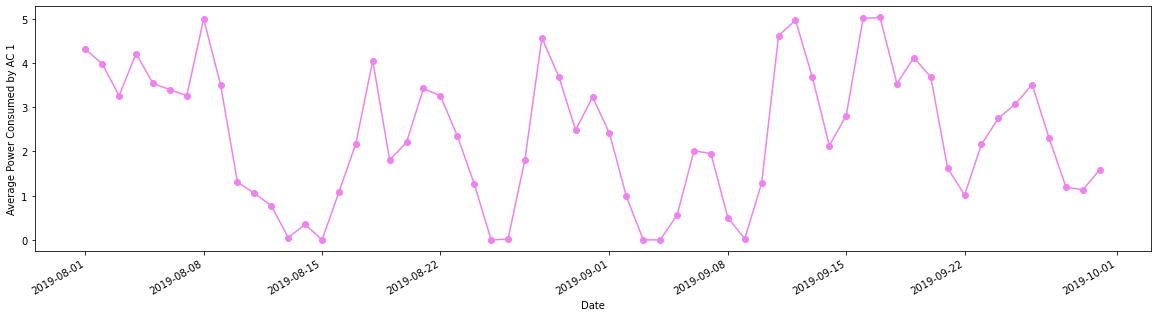

In [10]:
x= DailyData.index
y= DailyData.iloc[:,0]

plt.plot(x,y,color='Violet',marker='o')
plt.xlabel('Date')
plt.ylabel('Average Power Consumed by AC 1')

plt.gcf().autofmt_xdate()


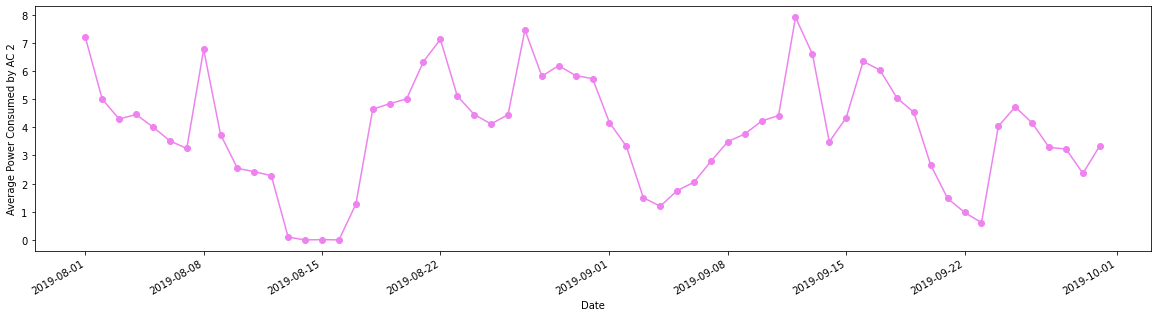

In [11]:
x= DailyData.index

y= DailyData.iloc[:,1]

plt.plot(x,y,color='Violet',marker='o')
plt.xlabel('Date')
plt.ylabel('Average Power Consumed by AC 2')

plt.gcf().autofmt_xdate()


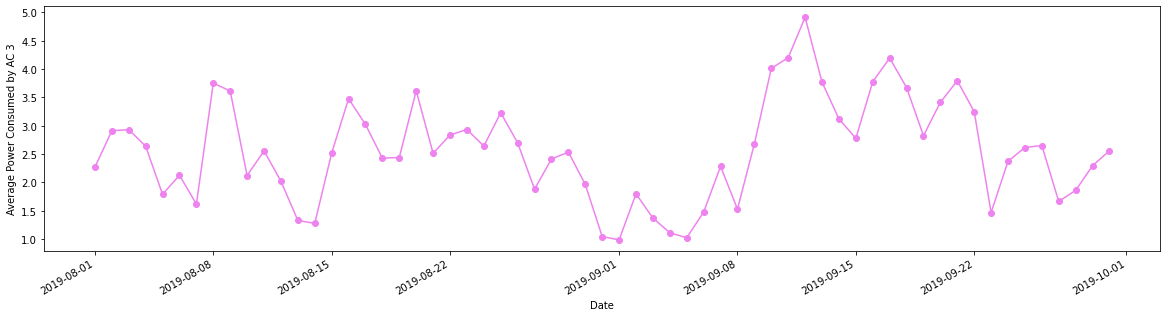

In [12]:
x= DailyData.index

y= DailyData.iloc[:,2]

plt.plot(x,y,color='Violet',marker='o')
plt.xlabel('Date')
plt.ylabel('Average Power Consumed by AC 3')

plt.gcf().autofmt_xdate()


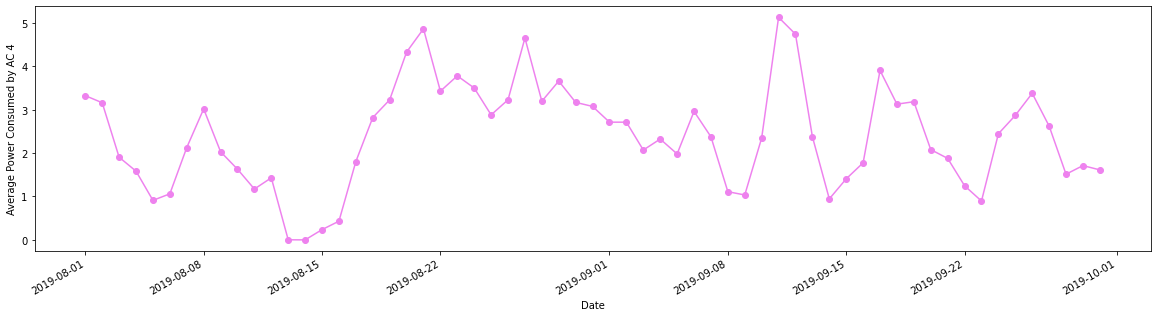

In [13]:
x= DailyData.index

y= DailyData.iloc[:,3]

plt.plot(x,y,color='Violet',marker='o')
plt.xlabel('Date')
plt.ylabel('Average Power Consumed by AC 4')

plt.gcf().autofmt_xdate()


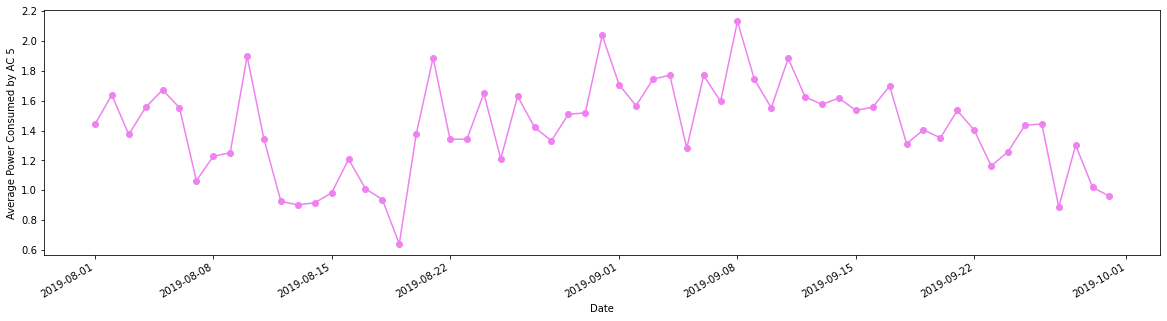

In [14]:
x= DailyData.index

y= DailyData.iloc[:,4]

plt.plot(x,y,color='Violet',marker='o')
plt.xlabel('Date')
plt.ylabel('Average Power Consumed by AC 5')

plt.gcf().autofmt_xdate()


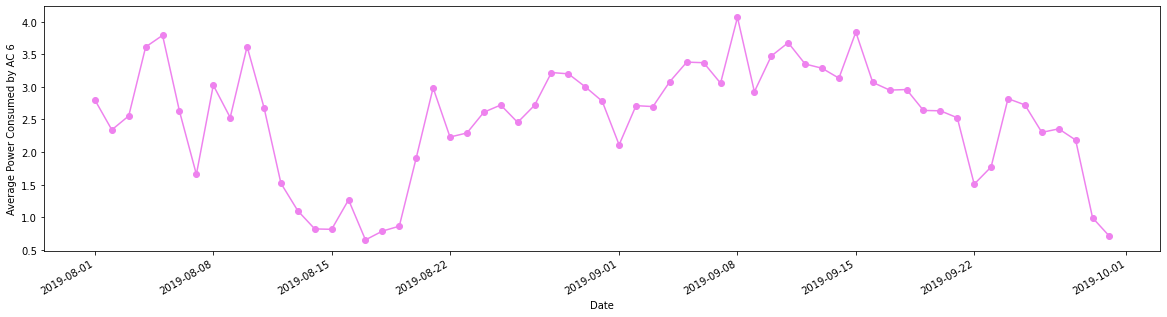

In [15]:
x= DailyData.index

y= DailyData.iloc[:,5]

plt.plot(x,y,color='Violet',marker='o')
plt.xlabel('Date')
plt.ylabel('Average Power Consumed by AC 6')

plt.gcf().autofmt_xdate()


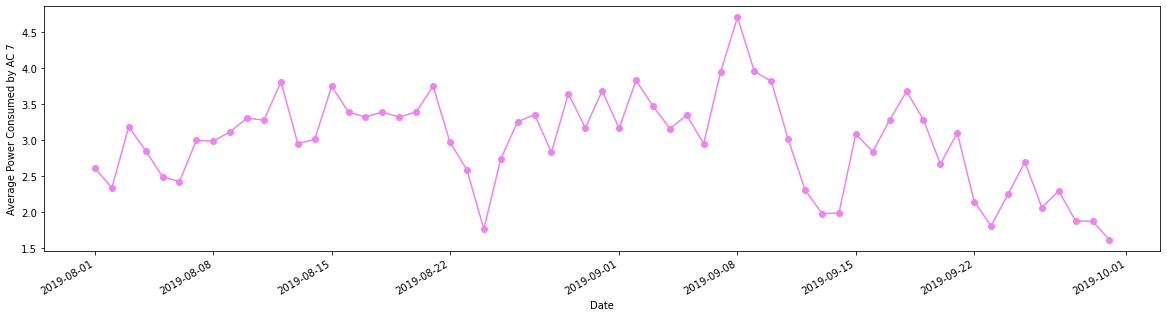

In [16]:
x= DailyData.index

y= DailyData.iloc[:,6]

plt.plot(x,y,color='Violet',marker='o')
plt.xlabel('Date')
plt.ylabel('Average Power Consumed by AC 7')

plt.gcf().autofmt_xdate()



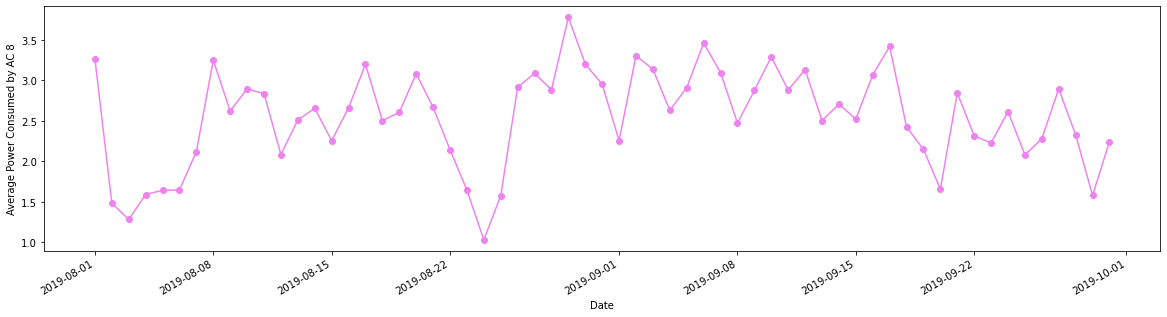

In [17]:
x= DailyData.index

y= DailyData.iloc[:,7]

plt.plot(x,y,color='Violet',marker='o')
plt.xlabel('Date')
plt.ylabel('Average Power Consumed by AC 8')

plt.gcf().autofmt_xdate()


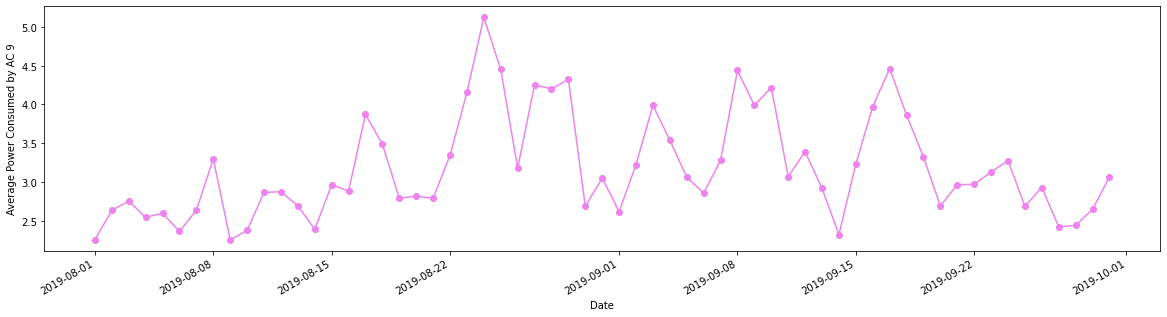

In [18]:
x= DailyData.index

y= DailyData.iloc[:,8]

plt.plot(x,y,color='Violet',marker='o')
plt.xlabel('Date')
plt.ylabel('Average Power Consumed by AC 9')

plt.gcf().autofmt_xdate()


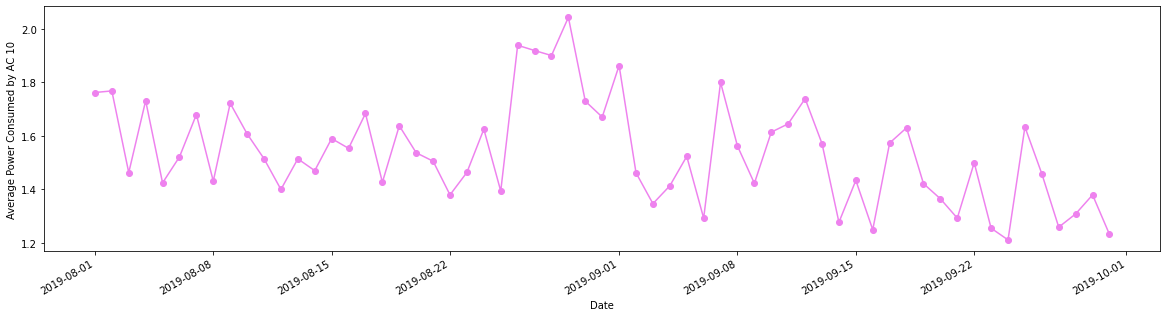

In [19]:
x= DailyData.index

y= DailyData.iloc[:,9]

plt.plot(x,y,color='Violet',marker='o')
plt.xlabel('Date')
plt.ylabel('Average Power Consumed by AC 10')

plt.gcf().autofmt_xdate()


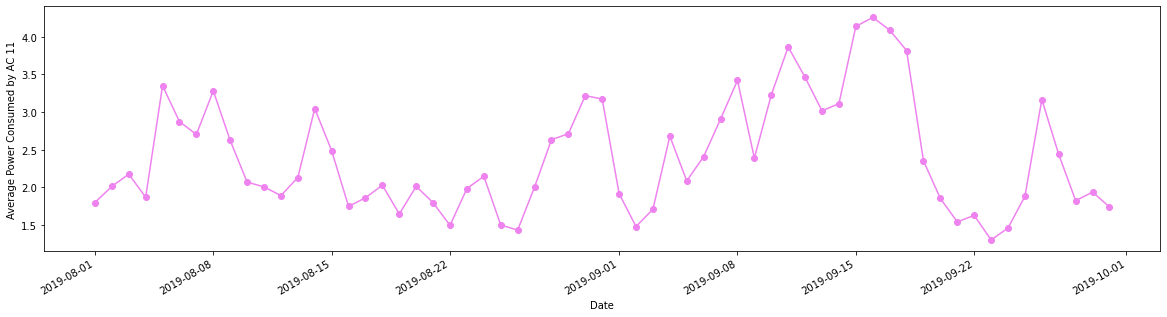

In [20]:
x= DailyData.index

y= DailyData.iloc[:,10]

plt.plot(x,y,color='Violet',marker='o')
plt.xlabel('Date')
plt.ylabel('Average Power Consumed by AC 11')

plt.gcf().autofmt_xdate()


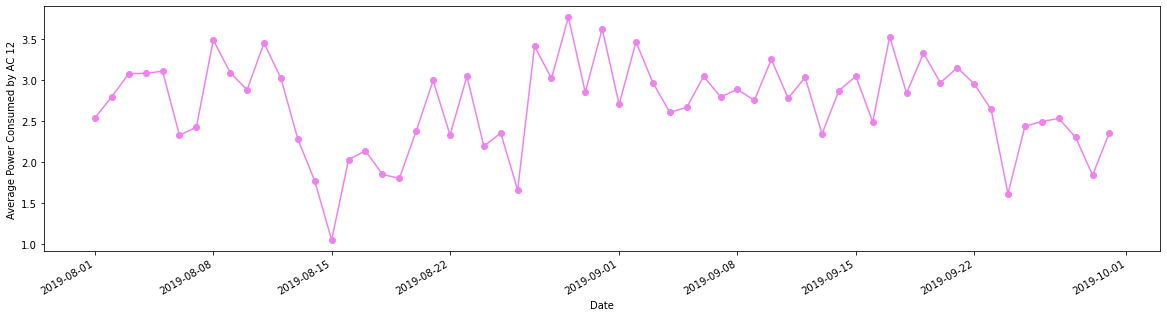

In [21]:
x= DailyData.index

y= DailyData.iloc[:,11]

plt.plot(x,y,color='Violet',marker='o')
plt.xlabel('Date')
plt.ylabel('Average Power Consumed by AC 12')

plt.gcf().autofmt_xdate()


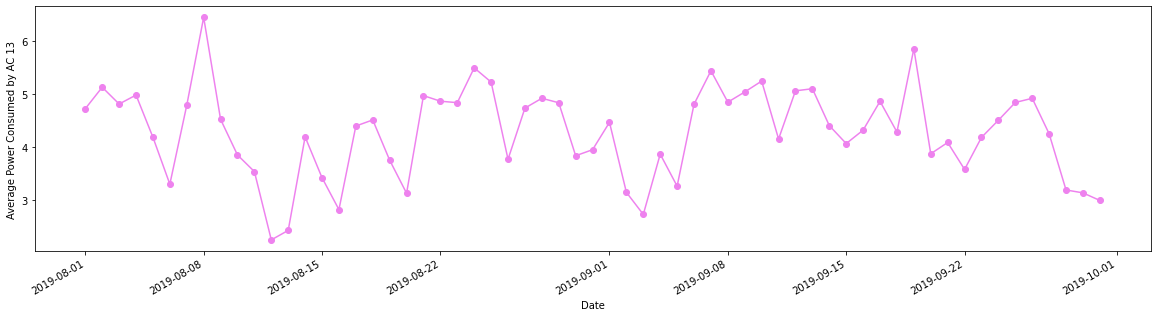

In [22]:
x= DailyData.index

y= DailyData.iloc[:,12]

plt.plot(x,y,color='Violet',marker='o')
plt.xlabel('Date')
plt.ylabel('Average Power Consumed by AC 13')

plt.gcf().autofmt_xdate()


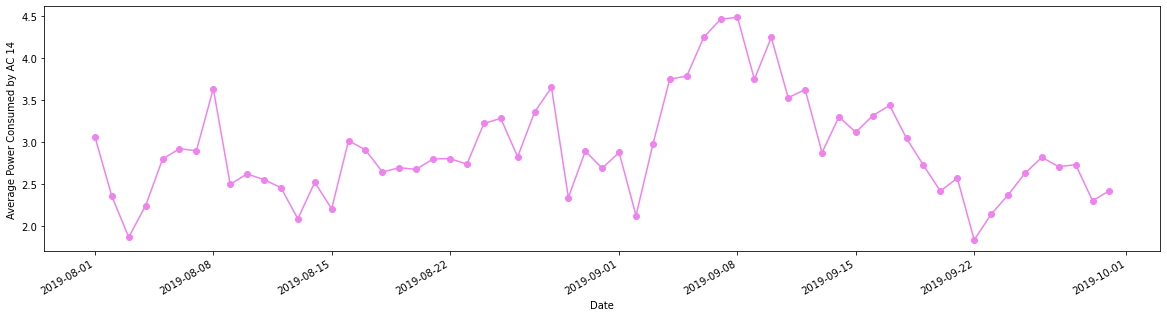

In [23]:
x= DailyData.index

y= DailyData.iloc[:,13]

plt.plot(x,y,color='Violet',marker='o')
plt.xlabel('Date')
plt.ylabel('Average Power Consumed by AC 14')

plt.gcf().autofmt_xdate()


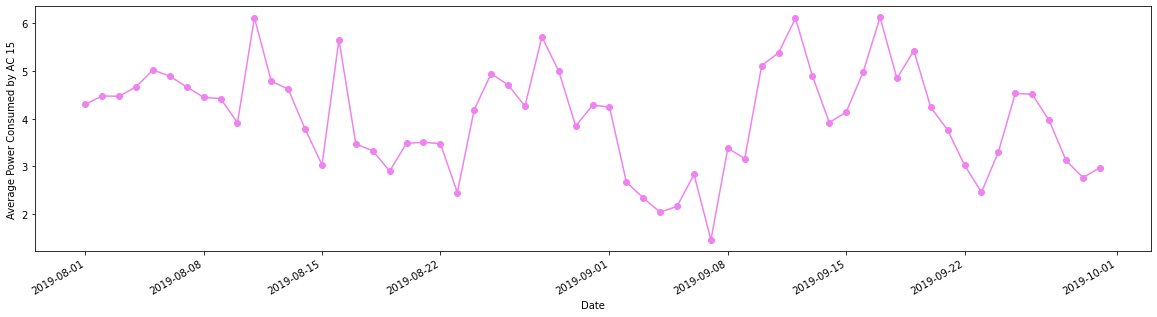

In [24]:
x= DailyData.index

y= DailyData.iloc[:,14]

plt.plot(x,y,color='Violet',marker='o')
plt.xlabel('Date')
plt.ylabel('Average Power Consumed by AC 15')

plt.gcf().autofmt_xdate()


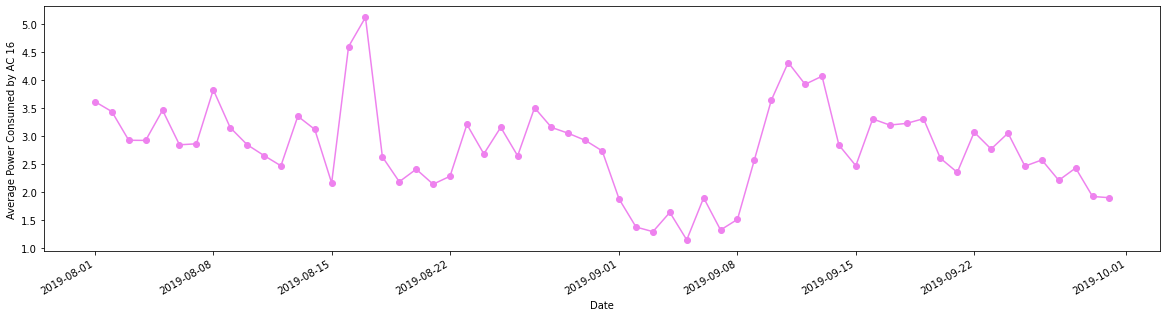

In [25]:
x= DailyData.index

y= DailyData.iloc[:,15]

plt.plot(x,y,color='Violet',marker='o')
plt.xlabel('Date')
plt.ylabel('Average Power Consumed by AC 16')

plt.gcf().autofmt_xdate()


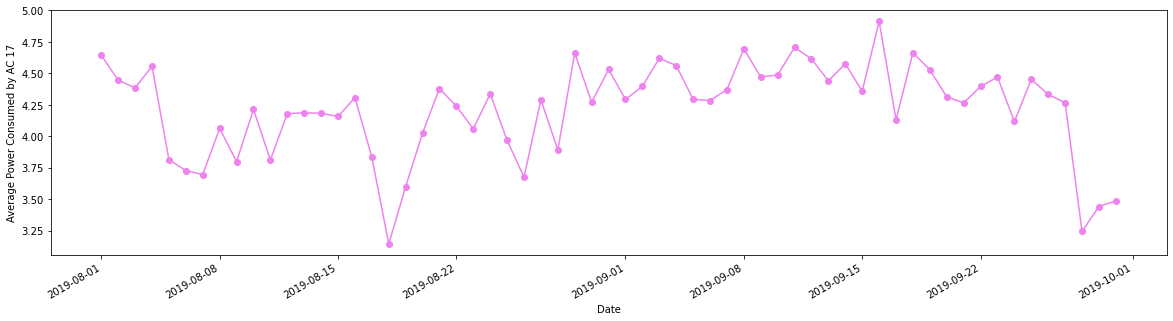

In [26]:
x= DailyData.index

y= DailyData.iloc[:,16]

plt.plot(x,y,color='Violet',marker='o')
plt.xlabel('Date')
plt.ylabel('Average Power Consumed by AC 17')

plt.gcf().autofmt_xdate()


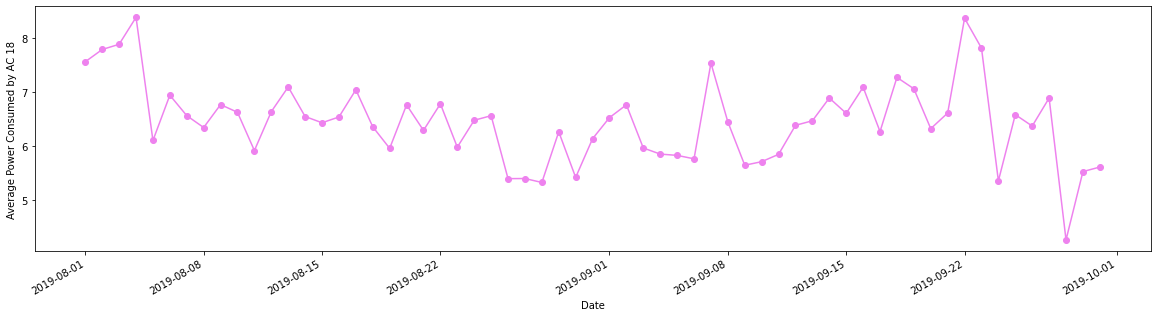

In [27]:
x= DailyData.index

y= DailyData.iloc[:,17]

plt.plot(x,y,color='Violet',marker='o')
plt.xlabel('Date')
plt.ylabel('Average Power Consumed by AC 18')


plt.gcf().autofmt_xdate()


## Lets Plot trend line for our line graphs

Text(0, 0.5, 'AC 18 Average Daily Power Consumption')

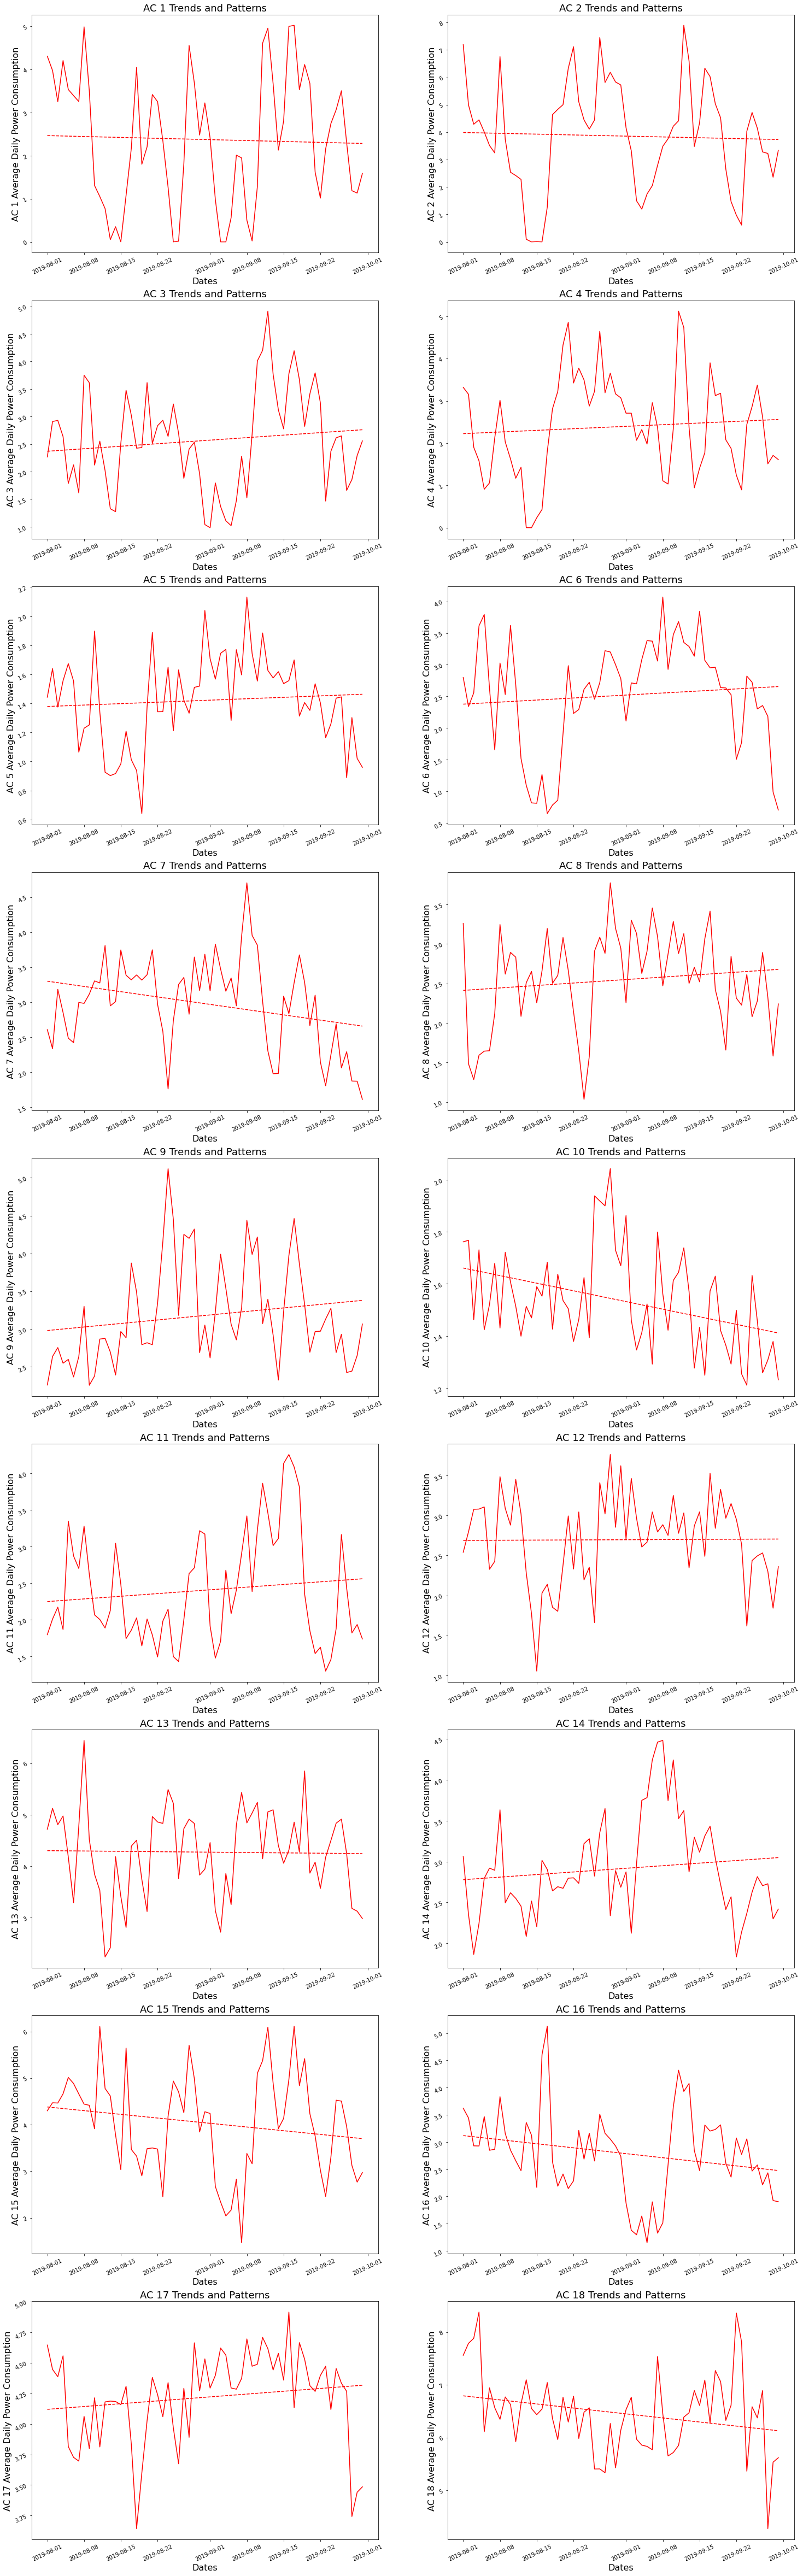

In [28]:
import matplotlib.dates as mdates


fig,ax =  plt.subplots( 9, 2,figsize = ( 25, 85))

 

    # 'AC 1' Power Consumption Trends

x = np.array(mdates.date2num(DailyData.index))

y = np.array(DailyData['AC 1'])

a = np.array(DailyData.index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[0, 0].plot(x,c(x),"r--")
ax[0, 0].plot( a, y, color = 'r')
ax[0, 0].set_title('AC 1 Trends and Patterns', fontsize=18)
ax[0][0].tick_params(rotation = 25)
ax[0,0].set_xlabel('Dates',fontsize=16)
ax[0,0].set_ylabel('AC 1 Average Daily Power Consumption', fontsize=16)



# 'AC 2' Power Consumption Trends

x = np.array(mdates.date2num(DailyData.index))

y = np.array(DailyData['AC 2'])

a = np.array(DailyData.index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[0, 1].plot(x,c(x),"r--")
ax[0, 1].plot( a, y, color = 'r')
ax[0, 1].set_title('AC 2 Trends and Patterns', fontsize=18)
ax[0][1].tick_params(rotation = 25)
ax[0,1].set_xlabel('Dates',fontsize=16)
ax[0,1].set_ylabel('AC 2 Average Daily Power Consumption', fontsize=16)



# 'AC 3' Power Consumption Trends

x = np.array(mdates.date2num(DailyData.index))

y = np.array(DailyData['AC 3'])

a = np.array(DailyData.index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[1, 0].plot(x,c(x),"r--")
ax[1, 0].plot( a, y, color = 'r')
ax[1, 0].set_title('AC 3 Trends and Patterns', fontsize=18)
ax[1][0].tick_params(rotation = 25)
ax[1,0].set_xlabel('Dates',fontsize=16)
ax[1,0].set_ylabel('AC 3 Average Daily Power Consumption', fontsize=16)



# 'AC 4' Power Consumption Trends

x = np.array(mdates.date2num(DailyData.index))

y = np.array(DailyData['AC 4'])

a = np.array(DailyData.index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[1, 1].plot(x,c(x),"r--")
ax[1, 1].plot( a, y, color = 'r')
ax[1, 1].set_title('AC 4 Trends and Patterns', fontsize=18)
ax[1][1].tick_params(rotation = 25)
ax[1,1].set_xlabel('Dates',fontsize=16)
ax[1,1].set_ylabel('AC 4 Average Daily Power Consumption', fontsize=16)



# 'AC 5' Power Consumption Trends

x = np.array(mdates.date2num(DailyData.index))

y = np.array(DailyData['AC 5'])

a = np.array(DailyData.index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[2, 0].plot(x,c(x),"r--")
ax[2, 0].plot( a, y, color = 'r')
ax[2, 0].set_title('AC 5 Trends and Patterns', fontsize=18)
ax[2][0].tick_params(rotation = 25)
ax[2,0].set_xlabel('Dates',fontsize=16)
ax[2,0].set_ylabel('AC 5 Average Daily Power Consumption', fontsize=16)



# 'AC 6' Power Consumption Trends

x = np.array(mdates.date2num(DailyData.index))

y = np.array(DailyData['AC 6'])

a = np.array(DailyData.index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[2, 1].plot(x,c(x),"r--")
ax[2, 1].plot( a, y, color = 'r')
ax[2, 1].set_title('AC 6 Trends and Patterns', fontsize=18)
ax[2][1].tick_params(rotation = 25)
ax[2,1].set_xlabel('Dates',fontsize=16)
ax[2,1].set_ylabel('AC 6 Average Daily Power Consumption', fontsize=16)



# 'AC 7' Power Consumption Trends

x = np.array(mdates.date2num(DailyData.index))

y = np.array(DailyData['AC 7'])

a = np.array(DailyData.index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[3, 0].plot(x,c(x),"r--")
ax[3, 0].plot( a, y, color = 'r')
ax[3, 0].set_title('AC 7 Trends and Patterns', fontsize=18)
ax[3][0].tick_params(rotation = 25)
ax[3,0].set_xlabel('Dates',fontsize=16)
ax[3,0].set_ylabel('AC 7 Average Daily Power Consumption', fontsize=16)



# 'AC 8' Power Consumption Trends

x = np.array(mdates.date2num(DailyData.index))

y = np.array(DailyData['AC 8'])

a = np.array(DailyData.index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[3, 1].plot(x,c(x),"r--")
ax[3, 1].plot( a, y, color = 'r')
ax[3, 1].set_title('AC 8 Trends and Patterns', fontsize=18)
ax[3][1].tick_params(rotation = 25)
ax[3,1].set_xlabel('Dates',fontsize=16)
ax[3,1].set_ylabel('AC 8 Average Daily Power Consumption', fontsize=16)



# 'AC 9' Power Consumption Trends

x = np.array(mdates.date2num(DailyData.index))

y = np.array(DailyData['AC 9'])

a = np.array(DailyData.index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[4, 0].plot(x,c(x),"r--")
ax[4, 0].plot( a, y, color = 'r')
ax[4, 0].set_title('AC 9 Trends and Patterns', fontsize=18)
ax[4][0].tick_params(rotation = 25)
ax[4,0].set_xlabel('Dates',fontsize=16)
ax[4,0].set_ylabel('AC 9 Average Daily Power Consumption', fontsize=16)



# 'AC 10' Power Consumption Trends

x = np.array(mdates.date2num(DailyData.index))

y = np.array(DailyData['AC 10'])

a = np.array(DailyData.index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[4, 1].plot(x,c(x),"r--")
ax[4, 1].plot( a, y, color = 'r')
ax[4, 1].set_title('AC 10 Trends and Patterns', fontsize=18)
ax[4][1].tick_params(rotation = 25)
ax[4,1].set_xlabel('Dates',fontsize=16)
ax[4,1].set_ylabel('AC 10 Average Daily Power Consumption', fontsize=16)



# 'AC 11' Power Consumption Trends

x = np.array(mdates.date2num(DailyData.index))

y = np.array(DailyData['AC 11'])

a = np.array(DailyData.index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[5, 0].plot(x,c(x),"r--")
ax[5, 0].plot( a, y, color = 'r')
ax[5, 0].set_title('AC 11 Trends and Patterns', fontsize=18)
ax[5][0].tick_params(rotation = 25)
ax[5,0].set_xlabel('Dates',fontsize=16)
ax[5,0].set_ylabel('AC 11 Average Daily Power Consumption', fontsize=16)



# 'AC 12' Power Consumption Trends

x = np.array(mdates.date2num(DailyData.index))

y = np.array(DailyData['AC 12'])

a = np.array(DailyData.index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[5, 1].plot(x,c(x),"r--")
ax[5, 1].plot( a, y, color = 'r')
ax[5, 1].set_title('AC 12 Trends and Patterns', fontsize=18)
ax[5][1].tick_params(rotation = 25)
ax[5,1].set_xlabel('Dates',fontsize=16)
ax[5,1].set_ylabel('AC 12 Average Daily Power Consumption', fontsize=16)



# 'AC 13' Power Consumption Trends

x = np.array(mdates.date2num(DailyData.index))

y = np.array(DailyData['AC 13'])

a = np.array(DailyData.index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[6, 0].plot(x,c(x),"r--")
ax[6, 0].plot( a, y, color = 'r')
ax[6, 0].set_title('AC 13 Trends and Patterns', fontsize=18)
ax[6][0].tick_params(rotation = 25)
ax[6,0].set_xlabel('Dates',fontsize=16)
ax[6,0].set_ylabel('AC 13 Average Daily Power Consumption', fontsize=16)



# 'AC 14' Power Consumption Trends

x = np.array(mdates.date2num(DailyData.index))

y = np.array(DailyData['AC 14'])

a = np.array(DailyData.index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[6, 1].plot(x,c(x),"r--")
ax[6, 1].plot( a, y, color = 'r')
ax[6, 1].set_title('AC 14 Trends and Patterns', fontsize=18)
ax[6][1].tick_params(rotation = 25)
ax[6,1].set_xlabel('Dates',fontsize=16)
ax[6,1].set_ylabel('AC 14 Average Daily Power Consumption', fontsize=16)



# 'AC 15' Power Consumption Trends

x = np.array(mdates.date2num(DailyData.index))

y = np.array(DailyData['AC 15'])

a = np.array(DailyData.index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[7, 0].plot(x,c(x),"r--")
ax[7, 0].plot( a, y, color = 'r')
ax[7, 0].set_title('AC 15 Trends and Patterns', fontsize=18)
ax[7][0].tick_params(rotation = 25)
ax[7,0].set_xlabel('Dates',fontsize=16)
ax[7,0].set_ylabel('AC 15 Average Daily Power Consumption', fontsize=16)



# 'AC 16' Power Consumption Trends

x = np.array(mdates.date2num(DailyData.index))

y = np.array(DailyData['AC 16'])

a = np.array(DailyData.index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[7, 1].plot(x,c(x),"r--")
ax[7, 1].plot( a, y, color = 'r')
ax[7, 1].set_title('AC 16 Trends and Patterns', fontsize=18)
ax[7][1].tick_params(rotation = 25)
ax[7,1].set_xlabel('Dates',fontsize=16)
ax[7,1].set_ylabel('AC 16 Average Daily Power Consumption', fontsize=16)



# 'AC 17' Power Consumption Trends

x = np.array(mdates.date2num(DailyData.index))

y = np.array(DailyData['AC 17'])

a = np.array(DailyData.index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[8, 0].plot(x,c(x),"r--")
ax[8, 0].plot( a, y, color = 'r')
ax[8, 0].set_title('AC 17 Trends and Patterns', fontsize=18)
ax[8][0].tick_params(rotation = 25)
ax[8,0].set_xlabel('Dates',fontsize=16)
ax[8,0].set_ylabel('AC 17 Average Daily Power Consumption', fontsize=16)



# 'AC 18' Power Consumption Trends

x = np.array(mdates.date2num(DailyData.index))

y = np.array(DailyData['AC 18'])

a = np.array(DailyData.index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[8, 1].plot(x,c(x),"r--")
ax[8, 1].plot( a, y, color = 'r')
ax[8, 1].set_title('AC 18 Trends and Patterns', fontsize=18)
ax[8, 1].tick_params(rotation = 25)
ax[8, 1].set_xlabel('Dates',fontsize=16)
ax[8, 1].set_ylabel('AC 18 Average Daily Power Consumption', fontsize=16)

## As we can see that most our daily data plots are having a lot of fluctuations and the visibility of trends was not through , let's smooth our data to find the trends and patterns throughly.

                   AC 1      AC 2      AC 3      AC 4      AC 5      AC 6  \
Date and Time                                                               
2019-08-01          NaN       NaN       NaN       NaN       NaN       NaN   
2019-08-02          NaN       NaN       NaN       NaN       NaN       NaN   
2019-08-03          NaN       NaN       NaN       NaN       NaN       NaN   
2019-08-04          NaN       NaN       NaN       NaN       NaN       NaN   
2019-08-05          NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
2019-09-26     2.541945  2.659424  2.793077  2.111019  1.370000  2.326065   
2019-09-27     2.344877  2.748960  2.542818  2.188457  1.303820  2.286421   
2019-09-28     2.283243  2.999811  2.266222  2.136404  1.270554  2.237512   
2019-09-29     2.300091  3.197540  2.129603  2.202733  1.215944  2.163743   
2019-09-30     2.218657  3.587781  2.285702  2.305165  1.186851  2.011412   

<AxesSubplot:xlabel='Date and Time'>

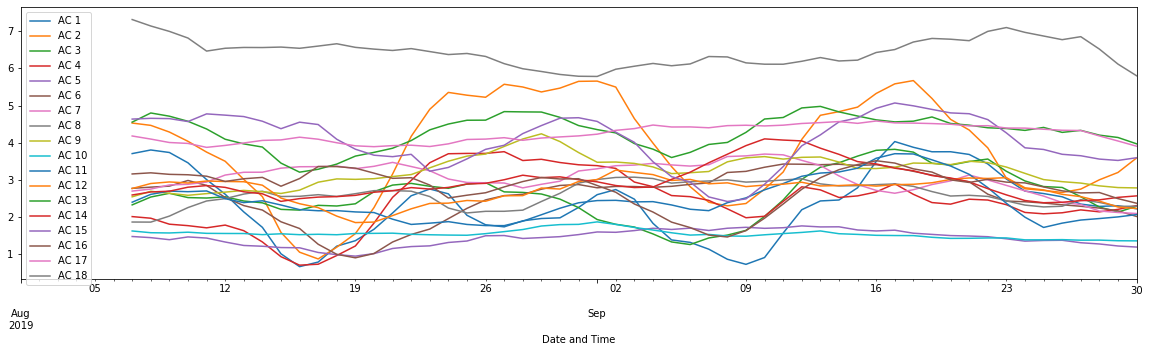

In [29]:
z=DailyData.iloc[:,0:].rolling(window=7)
zm=z.mean()
print(zm)
zm.plot()


## Lets plot trend lines for smoothed data of each AC.

Text(0, 0.5, 'AC 18 Smoothed Average Daily Power Consumption')

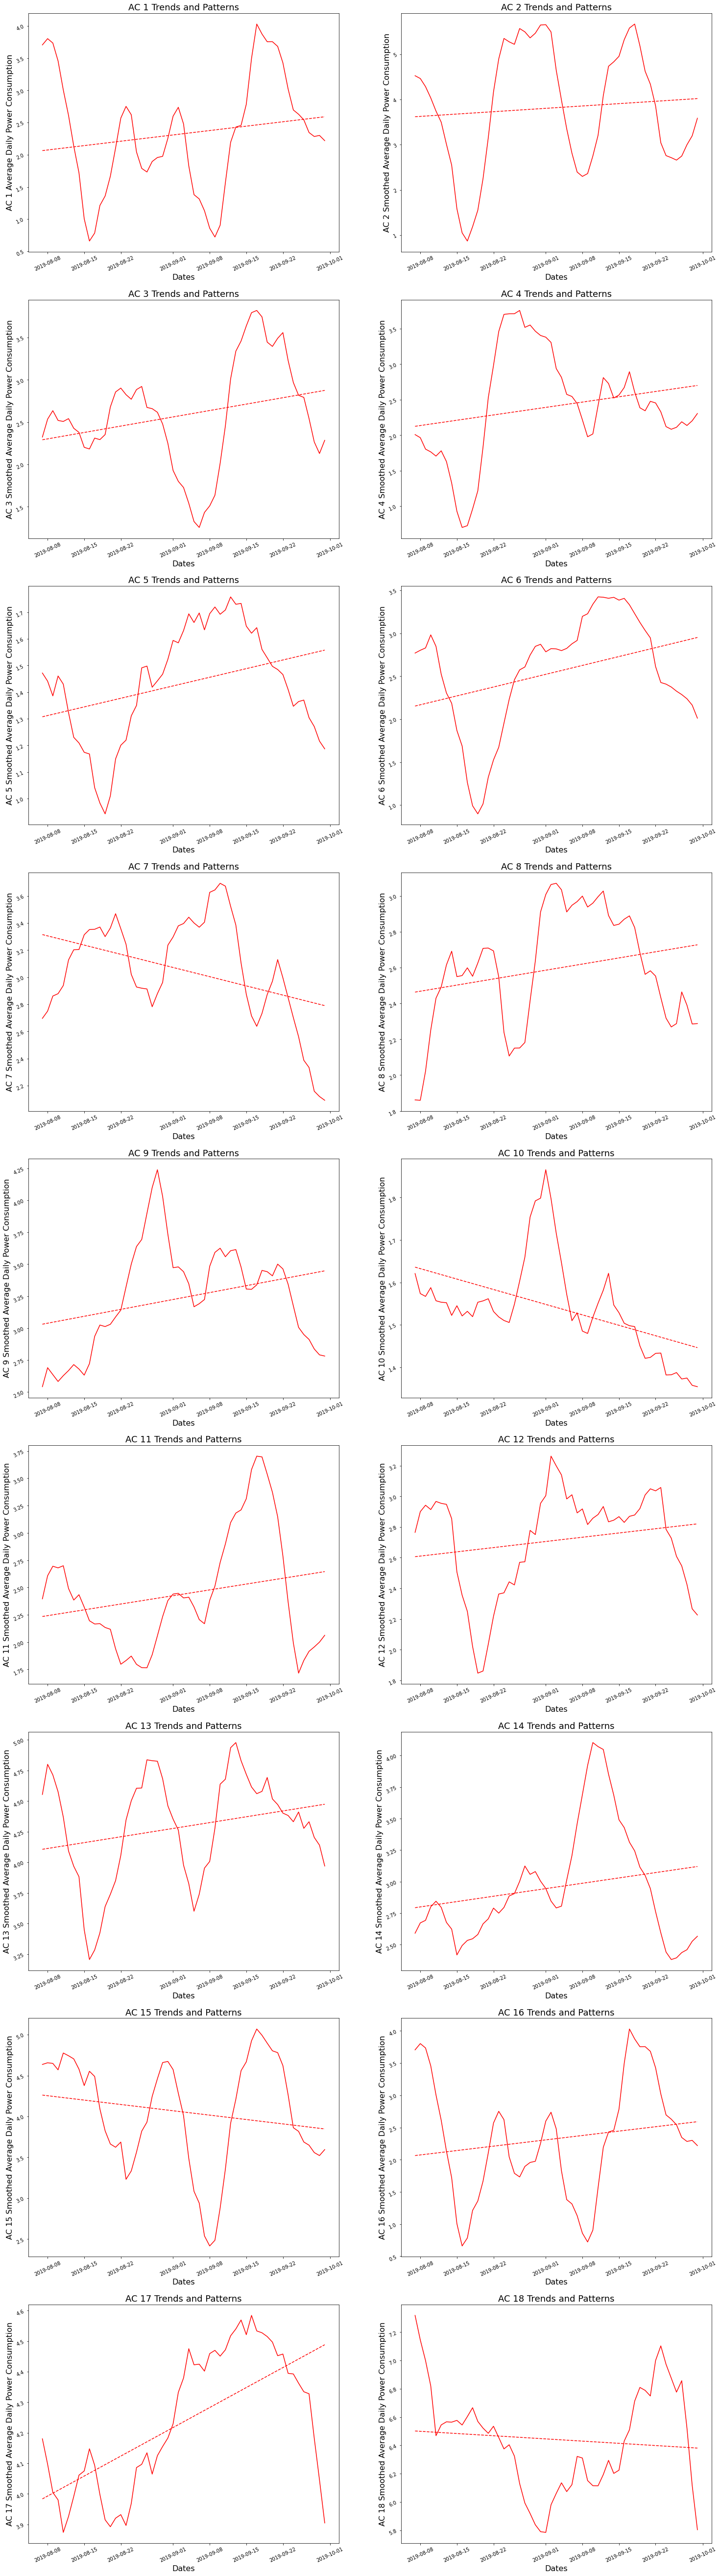

In [50]:
# Lets import necessary modules.

from statsmodels.tsa.api import SimpleExpSmoothing as ses
import seaborn as sns

# Lets smooth our data using 7 mean meathod 
z=DailyData.iloc[:,0:].rolling(window=7)
zm=z.mean()


fig,ax =  plt.subplots( 9, 2,figsize = (25, 95))

 

# 'AC 1' Power Consumption Trends after Smoothing the Data

x = np.array(mdates.date2num(zm.iloc[6:].index))

y = np.array(zm['AC 1'].iloc[6:])

a = np.array(zm.iloc[6:].index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[0, 0].plot(x,c(x),"r--")
ax[0, 0].plot( a, y, color = 'r')
ax[0, 0].set_title('AC 1 Trends and Patterns', fontsize=18)
ax[0][0].tick_params(rotation = 25)
ax[0,0].set_xlabel('Dates',fontsize=16)
ax[0,0].set_ylabel('AC 1 Average Daily Power Consumption', fontsize=16)


# 'AC 2' Power Consumption Trends after Smoothing the Data

x = np.array(mdates.date2num(zm.iloc[6:].index))

y = np.array(zm['AC 2'].iloc[6:])

a = np.array(zm.iloc[6:].index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[0, 1].plot(x,c(x),"r--")
ax[0, 1].plot( a, y, color = 'r')
ax[0, 1].set_title('AC 2 Trends and Patterns', fontsize=18)
ax[0][1].tick_params(rotation = 25)
ax[0,1].set_xlabel('Dates',fontsize=16)
ax[0,1].set_ylabel('AC 2 Smoothed Average Daily Power Consumption', fontsize=16)



# 'AC 3' Power Consumption Trends after Smoothing the Data

x = np.array(mdates.date2num(zm.iloc[6:].index))

y = np.array(zm['AC 3'].iloc[6:])

a = np.array(zm.iloc[6:].index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[1, 0].plot(x,c(x),"r--")
ax[1, 0].plot( a, y, color = 'r')
ax[1, 0].set_title('AC 3 Trends and Patterns', fontsize=18)
ax[1][0].tick_params(rotation = 25)
ax[1,0].set_xlabel('Dates',fontsize=16)
ax[1,0].set_ylabel('AC 3 Smoothed Average Daily Power Consumption', fontsize=16)



# 'AC 4' Power Consumption Trends after Smoothing the Data

x = np.array(mdates.date2num(zm.iloc[6:].index))

y = np.array(zm['AC 4'].iloc[6:])

a = np.array(zm.iloc[6:].index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[1, 1].plot(x,c(x),"r--")
ax[1, 1].plot( a, y, color = 'r')
ax[1, 1].set_title('AC 4 Trends and Patterns', fontsize=18)
ax[1][1].tick_params(rotation = 25)
ax[1,1].set_xlabel('Dates',fontsize=16)
ax[1,1].set_ylabel('AC 4 Smoothed Average Daily Power Consumption', fontsize=16)



# 'AC 5' Power Consumption Trends after Smoothing the Data

x = np.array(mdates.date2num(zm.iloc[6:].index))

y = np.array(zm['AC 5'].iloc[6:])

a = np.array(zm.iloc[6:].index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[2, 0].plot(x,c(x),"r--")
ax[2, 0].plot( a, y, color = 'r')
ax[2, 0].set_title('AC 5 Trends and Patterns', fontsize=18)
ax[2][0].tick_params(rotation = 25)
ax[2,0].set_xlabel('Dates',fontsize=16)
ax[2,0].set_ylabel('AC 5 Smoothed Average Daily Power Consumption', fontsize=16)



# 'AC 6' Power Consumption Trends after Smoothing the Data

x = np.array(mdates.date2num(zm.iloc[6:].index))

y = np.array(zm['AC 6'].iloc[6:])

a = np.array(zm.iloc[6:].index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[2, 1].plot(x,c(x),"r--")
ax[2, 1].plot( a, y, color = 'r')
ax[2, 1].set_title('AC 6 Trends and Patterns', fontsize=18)
ax[2][1].tick_params(rotation = 25)
ax[2,1].set_xlabel('Dates',fontsize=16)
ax[2,1].set_ylabel('AC 6 Smoothed Average Daily Power Consumption', fontsize=16)



# 'AC 7' Power Consumption Trends after Smoothing the Data

x = np.array(mdates.date2num(zm.iloc[6:].index))

y = np.array(zm['AC 7'].iloc[6:])

a = np.array(zm.iloc[6:].index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[3, 0].plot(x,c(x),"r--")
ax[3, 0].plot( a, y, color = 'r')
ax[3, 0].set_title('AC 7 Trends and Patterns', fontsize=18)
ax[3][0].tick_params(rotation = 25)
ax[3,0].set_xlabel('Dates',fontsize=16)
ax[3,0].set_ylabel('AC 7 Smoothed Average Daily Power Consumption', fontsize=16)



# 'AC 8' Power Consumption Trends after Smoothing the Data

x = np.array(mdates.date2num(zm.iloc[6:].index))

y = np.array(zm['AC 8'].iloc[6:])

a = np.array(zm.iloc[6:].index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[3, 1].plot(x,c(x),"r--")
ax[3, 1].plot( a, y, color = 'r')
ax[3, 1].set_title('AC 8 Trends and Patterns', fontsize=18)
ax[3][1].tick_params(rotation = 25)
ax[3,1].set_xlabel('Dates',fontsize=16)
ax[3,1].set_ylabel('AC 8 Smoothed Average Daily Power Consumption', fontsize=16)



# 'AC 9' Power Consumption Trends after Smoothing the Data

x = np.array(mdates.date2num(zm.iloc[6:].index))

y = np.array(zm['AC 9'].iloc[6:])

a = np.array(zm.iloc[6:].index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[4, 0].plot(x,c(x),"r--")
ax[4, 0].plot( a, y, color = 'r')
ax[4, 0].set_title('AC 9 Trends and Patterns', fontsize=18)
ax[4][0].tick_params(rotation = 25)
ax[4,0].set_xlabel('Dates',fontsize=16)
ax[4,0].set_ylabel('AC 9 Smoothed Average Daily Power Consumption', fontsize=16)



# 'AC 10' Power Consumption Trends after Smoothing the Data

x = np.array(mdates.date2num(zm.iloc[6:].index))

y = np.array(zm['AC 10'].iloc[6:])

a = np.array(zm.iloc[6:].index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[4, 1].plot(x,c(x),"r--")
ax[4, 1].plot( a, y, color = 'r')
ax[4, 1].set_title('AC 10 Trends and Patterns', fontsize=18)
ax[4][1].tick_params(rotation = 25)
ax[4,1].set_xlabel('Dates',fontsize=16)
ax[4,1].set_ylabel('AC 10 Smoothed Average Daily Power Consumption', fontsize=16)



# 'AC 11' Power Consumption Trends after Smoothing the Data

x = np.array(mdates.date2num(zm.iloc[6:].index))

y = np.array(zm['AC 11'].iloc[6:])

a = np.array(zm.iloc[6:].index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[5, 0].plot(x,c(x),"r--")
ax[5, 0].plot( a, y, color = 'r')
ax[5, 0].set_title('AC 11 Trends and Patterns', fontsize=18)
ax[5][0].tick_params(rotation = 25)
ax[5,0].set_xlabel('Dates',fontsize=16)
ax[5,0].set_ylabel('AC 11 Smoothed Average Daily Power Consumption', fontsize=16)



# 'AC 12' Power Consumption Trends after Smoothing the Data

x = np.array(mdates.date2num(zm.iloc[6:].index))

y = np.array(zm['AC 12'].iloc[6:])

a = np.array(zm.iloc[6:].index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[5, 1].plot(x,c(x),"r--")
ax[5, 1].plot( a, y, color = 'r')
ax[5, 1].set_title('AC 12 Trends and Patterns', fontsize=18)
ax[5][1].tick_params(rotation = 25)
ax[5,1].set_xlabel('Dates',fontsize=16)
ax[5,1].set_ylabel('AC 12 Smoothed Average Daily Power Consumption', fontsize=16)




# 'AC 13' Power Consumption Trends after Smoothing the Data

x = np.array(mdates.date2num(zm.iloc[6:].index))

y = np.array(zm['AC 13'].iloc[6:])

a = np.array(zm.iloc[6:].index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[6, 0].plot(x,c(x),"r--")
ax[6, 0].plot( a, y, color = 'r')
ax[6, 0].set_title('AC 13 Trends and Patterns', fontsize=18)
ax[6][0].tick_params(rotation = 25)
ax[6,0].set_xlabel('Dates',fontsize=16)
ax[6,0].set_ylabel('AC 13 Smoothed Average Daily Power Consumption', fontsize=16)



# 'AC 14' Power Consumption Trends after Smoothing the Data

x = np.array(mdates.date2num(zm.iloc[6:].index))

y = np.array(zm['AC 14'].iloc[6:])

a = np.array(zm.iloc[6:].index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[6, 1].plot(x,c(x),"r--")
ax[6, 1].plot( a, y, color = 'r')
ax[6, 1].set_title('AC 14 Trends and Patterns', fontsize=18)
ax[6][1].tick_params(rotation = 25)
ax[6,1].set_xlabel('Dates',fontsize=16)
ax[6,1].set_ylabel('AC 14 Smoothed Average Daily Power Consumption', fontsize=16)



# 'AC 15' Power Consumption Trends after Smoothing the Data

x = np.array(mdates.date2num(zm.iloc[6:].index))

y = np.array(zm['AC 15'].iloc[6:])

a = np.array(zm.iloc[6:].index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[7, 0].plot(x,c(x),"r--")
ax[7, 0].plot( a, y, color = 'r')
ax[7, 0].set_title('AC 15 Trends and Patterns', fontsize=18)
ax[7][0].tick_params(rotation = 25)
ax[7,0].set_xlabel('Dates',fontsize=16)
ax[7,0].set_ylabel('AC 15 Smoothed Average Daily Power Consumption', fontsize=16)



# 'AC 16' Power Consumption Trends after Smoothing the Data

x = np.array(mdates.date2num(zm.iloc[6:].index))

y = np.array(zm['AC 1'].iloc[6:])

a = np.array(zm.iloc[6:].index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[7, 1].plot(x,c(x),"r--")
ax[7, 1].plot( a, y, color = 'r')
ax[7, 1].set_title('AC 16 Trends and Patterns', fontsize=18)
ax[7][1].tick_params(rotation = 25)
ax[7,1].set_xlabel('Dates',fontsize=16)
ax[7,1].set_ylabel('AC 16 Smoothed Average Daily Power Consumption', fontsize=16)



# 'AC 17' Power Consumption Trends after Smoothing the Data

x = np.array(mdates.date2num(zm.iloc[6:].index))

y = np.array(zm['AC 17'].iloc[6:])

a = np.array(zm.iloc[6:].index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[8, 0].plot(x,c(x),"r--")
ax[8, 0].plot( a, y, color = 'r')
ax[8, 0].set_title('AC 17 Trends and Patterns', fontsize=18)
ax[8][0].tick_params(rotation = 25)
ax[8,0].set_xlabel('Dates',fontsize=16)
ax[8,0].set_ylabel('AC 17 Smoothed Average Daily Power Consumption', fontsize=16)




# 'AC 18' Power Consumption Trends after Smoothing the Data

x = np.array(mdates.date2num(zm.iloc[6:].index))

y = np.array(zm['AC 18'].iloc[6:])

a = np.array(zm.iloc[6:].index)

z = np.polyfit(x, y,1)

c = np.poly1d(z)

ax[8, 1].plot(x,c(x),"r--")
ax[8, 1].plot( a, y, color = 'r')
ax[8, 1].set_title('AC 18 Trends and Patterns', fontsize=18)
ax[8][1].tick_params(rotation = 25)
ax[8,1].set_xlabel('Dates',fontsize=16)
ax[8,1].set_ylabel('AC 18 Smoothed Average Daily Power Consumption', fontsize=16)



# Most of our plots are having cyclic pattern with random variations.

# Lets identify the trends from above trend line plots.

### AC 1 is having a positive/ upward trend
### AC 2 is having a positive/upward trend
### AC 3 is having a positive /upward trend
### AC 4 is having a positive /upward trend
### AC 5 is having a positive /upward trend
### AC 6 is having a positive /upward trend
### AC 7 is having a negative /downward trend
### AC 8 is having a positive /upward trend
### AC 9 is having a positive /upward trend
### AC 10 is having a negative /downward trend
### AC 11 is having a positive /upward trend
### AC 12 is having a positive /upward trend
### AC 13 is having a positive /upward trend
### AC 14 is having a positive /upward trend
### AC 15 is having a negative /downward trend
### AC 16 is having a positive /upward trend
### AC 17 is having a positive /upward trend
### AC 18 is having a negative /downward trend


# Lets solve our 2nd problem.

In [31]:
New_DF.describe()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
count,87840.000000,87840.000000,87840.000000,87840.000000,87840.000000,87840.000000,87840.000000,87840.000000,87840.000000,87840.000000,87840.000000,87840.000000,87840.000000,87840.000000,87840.000000,87840.000000,87840.000000,87840.000000
mean,2.376302,3.861889,2.565133,2.392535,1.420251,2.516540,2.977509,2.545456,3.178516,1.536174,2.405176,2.696840,4.274349,2.914119,4.040709,2.797083,4.216725,6.460183
std,2.259114,2.525798,1.467062,1.775448,0.746316,1.624362,1.440236,1.468930,1.492739,0.669579,1.527753,1.405755,1.824579,1.437933,1.996293,1.576737,1.118502,2.311942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.116194,1.707850,1.238847,0.970037,1.517678,2.189626,1.758899,2.299208,1.118264,1.591178,1.944881,3.244774,1.863226,3.023904,1.874997,3.735742,4.014328
50%,2.085373,3.777680,2.485633,2.308809,1.379885,2.665183,3.002792,2.608947,3.075014,1.500648,2.356894,2.730869,4.200212,2.791005,3.980972,2.672262,4.608581,7.123626
75%,3.644302,5.414954,3.419634,3.468686,1.866239,3.601742,3.874786,3.477553,4.066725,1.952497,3.250005,3.555242,5.357014,3.815572,5.229118,3.680762,4.957130,8.313334
max,11.194789,11.147141,8.430909,9.879500,5.495358,9.929291,9.356776,9.331506,10.026747,4.625030,10.363151,9.887306,9.796393,9.054969,10.349998,10.654430,5.950261,11.040031


[2.37630248 3.8618887  2.56513297 2.39253499 1.42025139 2.51654049
 2.977509   2.54545598 3.17851616 1.5361739  2.40517592 2.69684005
 4.27434882 2.9141191  4.04070879 2.79708315 4.21672543 6.46018263]
['AC 1' 'AC 2' 'AC 3' 'AC 4' 'AC 5' 'AC 6' 'AC 7' 'AC 8' 'AC 9' 'AC 10'
 'AC 11' 'AC 12' 'AC 13' 'AC 14' 'AC 15' 'AC 16' 'AC 17' 'AC 18']


Text(0.5, 0, 'Average of Power Consumed in 2 months')

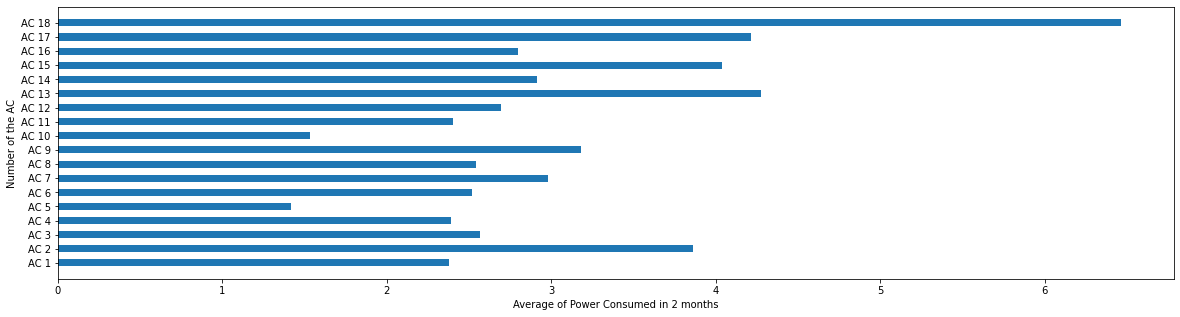

In [32]:
# Lets plot a bar graph for all mean value's of AC's to visually findout the AC's having highest and lowest average power consumption.s
x = np.array( New_DF.iloc[:,1:19].mean())
a = np.array( New_DF.columns)
y =np.delete(a,0)
print(x)
print(y)
plt.barh(y,x,height=0.5)
plt.ylabel('Number of the AC')
plt.xlabel('Average of Power Consumed in 2 months')

 

### From the above horizontal graph, We can say that:

### 1. AC 18 has the highest average of power consumption which means its the most used AC.
### (AC 18 mean = 6.460183).

### 2. AC 5 has the lowest average of power consumption which means its the least used AC. 
### (AC 5 mean = 1.420251). 

# Let's complete our 3rd task.

### 1. For temperature data, I downloaded the temperature data from https://www.ncdc.noaa.gov in the form of csv.
    
### 2. It contains Daily Average temperature in Gurgaon from 2019-08-01 to 2019-09-30.  

In [33]:
# Lets load our Temp dataset which is in the form of csv
Temp_Data = pd.read_csv('C:/Users/SREEKAR7278/Desktop/Gurgaon Temperature Data In ``C.csv')
Temp_Data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN
0,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2019-08-01,31.3,36.8,27.2
1,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2019-08-02,29.1,36.8,NaN
2,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2019-08-03,28.4,34.2,26.3
3,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2019-08-04,29.8,36.0,26.1
4,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2019-08-05,31.1,36.0,26.4
...,...,...,...,...,...,...,...,...,...
56,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2019-09-26,28.4,34.5,24.8
57,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2019-09-27,27.1,33.8,24.4
58,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2019-09-28,26.7,32.2,23.0
59,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2019-09-29,26.3,32.2,23.2


In the Temp_Data dataframe, we have 9 columns but we need only 2(DATE,TAVG) of them.

So lets remove the unnecessary columns and preprocess our Data Frame.

In [34]:
M = ['STATION','NAME','LATITUDE','LONGITUDE','ELEVATION','TMAX','TMIN']

# The above list contains the names of columns that we wanted to remove.

New_TD = Temp_Data.drop(M, axis=1)

# Lets view our new Temperature DataFrame.
New_TD

,DATE,TAVG
0,2019-08-01,31.3
1,2019-08-02,29.1
2,2019-08-03,28.4
3,2019-08-04,29.8
4,2019-08-05,31.1
...,...,...
56,2019-09-26,28.4
57,2019-09-27,27.1
58,2019-09-28,26.7
59,2019-09-29,26.3


In [54]:
#Lets resample our 'New_DF' dataframe with 1Day frequency and also average the power consumption values of each AC for the resmaple frequency.

New_DF_DD = New_DF.resample('1D', on='Date and Time').mean()

New_DF_DD


,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Date and Time,,,,,,,,,,,,,,,,,,
2019-08-01,4.311251,7.192770,2.265914,3.320282,1.442006,2.799339,2.606838,3.261085,2.257789,1.761544,1.797694,2.539742,4.718219,3.061935,4.298479,3.620367,4.643621,7.561096
2019-08-02,3.977381,4.997287,2.910071,3.156393,1.638953,2.340743,2.334359,1.483584,2.635184,1.767480,2.011486,2.795197,5.123942,2.353536,4.470403,3.442106,4.444483,7.787343
2019-08-03,3.254814,4.291223,2.929456,1.902713,1.374562,2.555402,3.181457,1.283756,2.753423,1.462211,2.173384,3.077708,4.807019,1.865291,4.464468,2.929687,4.384711,7.883526
2019-08-04,4.210091,4.451087,2.636284,1.582040,1.555314,3.614907,2.850690,1.591165,2.546160,1.730887,1.868694,3.080474,4.976188,2.242919,4.661893,2.927226,4.555513,8.381225
2019-08-05,3.536980,4.008955,1.785850,0.910069,1.673115,3.793809,2.484910,1.642972,2.596842,1.423775,3.347532,3.107324,4.177918,2.795171,5.013642,3.466886,3.813778,6.106891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-26,3.507869,4.147379,2.649227,3.374334,1.444154,2.301838,2.060002,2.278169,2.929070,1.457746,3.163686,2.494480,4.914755,2.816173,4.505642,2.578243,4.331568,6.372984
2019-09-27,2.299397,3.281170,1.660224,2.620449,0.888126,2.355991,2.290790,2.892445,2.423409,1.258341,2.436058,2.531860,4.244210,2.705481,3.960751,2.213882,4.265494,6.890618
2019-09-28,1.187906,3.226275,1.856999,1.511555,1.301799,2.184178,1.872020,2.325760,2.441901,1.307919,1.822027,2.301743,3.182070,2.729225,3.126808,2.433880,3.242749,4.270624


In [81]:
#Lets join the "TAVG' column of 'New_TD' dataframe to 'DailyData' dataframe

T = list(New_TD['TAVG'])

print(T)

Day_Avg = DailyData.assign(TempAvg=T)
Day_Avg



[31.3, 29.1, 28.4, 29.8, 31.1, 27.4, 30.2, 32.4, 30.2, 29.6, 31.8, 30.2, 29.2, 29.4, 29.7, 28.3, 26.3, 27.4, 30.0, 30.3, 30.9, 29.2, 31.4, 29.7, 27.7, 30.4, 31.6, 32.4, 31.4, 31.9, 31.8, 29.3, 31.1, 31.4, 30.8, 31.0, 30.3, 29.6, 31.5, 32.3, 32.5, 33.2, 31.6, 31.7, 30.5, 29.6, 31.6, 30.7, 29.3, 27.9, 29.3, 26.7, 25.9, 27.4, 27.8, 28.1, 28.4, 27.1, 26.7, 26.3, 26.6]


,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,TempAvg
Date and Time,,,,,,,,,,,,,,,,,,,
2019-08-01,4.311251,7.192770,2.265914,3.320282,1.442006,2.799339,2.606838,3.261085,2.257789,1.761544,1.797694,2.539742,4.718219,3.061935,4.298479,3.620367,4.643621,7.561096,31.3
2019-08-02,3.977381,4.997287,2.910071,3.156393,1.638953,2.340743,2.334359,1.483584,2.635184,1.767480,2.011486,2.795197,5.123942,2.353536,4.470403,3.442106,4.444483,7.787343,29.1
2019-08-03,3.254814,4.291223,2.929456,1.902713,1.374562,2.555402,3.181457,1.283756,2.753423,1.462211,2.173384,3.077708,4.807019,1.865291,4.464468,2.929687,4.384711,7.883526,28.4
2019-08-04,4.210091,4.451087,2.636284,1.582040,1.555314,3.614907,2.850690,1.591165,2.546160,1.730887,1.868694,3.080474,4.976188,2.242919,4.661893,2.927226,4.555513,8.381225,29.8
2019-08-05,3.536980,4.008955,1.785850,0.910069,1.673115,3.793809,2.484910,1.642972,2.596842,1.423775,3.347532,3.107324,4.177918,2.795171,5.013642,3.466886,3.813778,6.106891,31.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-26,3.507869,4.147379,2.649227,3.374334,1.444154,2.301838,2.060002,2.278169,2.929070,1.457746,3.163686,2.494480,4.914755,2.816173,4.505642,2.578243,4.331568,6.372984,28.4
2019-09-27,2.299397,3.281170,1.660224,2.620449,0.888126,2.355991,2.290790,2.892445,2.423409,1.258341,2.436058,2.531860,4.244210,2.705481,3.960751,2.213882,4.265494,6.890618,27.1
2019-09-28,1.187906,3.226275,1.856999,1.511555,1.301799,2.184178,1.872020,2.325760,2.441901,1.307919,1.822027,2.301743,3.182070,2.729225,3.126808,2.433880,3.242749,4.270624,26.7


In [77]:
Day_Avg



Date and Time
2019-08-01    38.492770
2019-08-02    34.097287
2019-08-03    32.691223
2019-08-04    34.251087
2019-08-05    35.108955
                ...    
2019-09-26    32.547379
2019-09-27    30.381170
2019-09-28    29.926275
2019-09-29    28.659928
2019-09-30    29.944281
Freq: D, Length: 61, dtype: float64

# 4 task : let's complete 
### Using the power data, predict/forecast the power consumption

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Temp_Avg
Date and Time,,,,,,,,,,,,,,,,,,,
2019-08-01,4.311251,7.192770,2.265914,3.320282,1.442006,2.799339,2.606838,3.261085,2.257789,1.761544,1.797694,2.539742,4.718219,3.061935,4.298479,3.620367,4.643621,7.561096,35.611251
2019-08-02,3.977381,4.997287,2.910071,3.156393,1.638953,2.340743,2.334359,1.483584,2.635184,1.767480,2.011486,2.795197,5.123942,2.353536,4.470403,3.442106,4.444483,7.787343,33.077381
2019-08-03,3.254814,4.291223,2.929456,1.902713,1.374562,2.555402,3.181457,1.283756,2.753423,1.462211,2.173384,3.077708,4.807019,1.865291,4.464468,2.929687,4.384711,7.883526,31.654814
2019-08-04,4.210091,4.451087,2.636284,1.582040,1.555314,3.614907,2.850690,1.591165,2.546160,1.730887,1.868694,3.080474,4.976188,2.242919,4.661893,2.927226,4.555513,8.381225,34.010091
2019-08-05,3.536980,4.008955,1.785850,0.910069,1.673115,3.793809,2.484910,1.642972,2.596842,1.423775,3.347532,3.107324,4.177918,2.795171,5.013642,3.466886,3.813778,6.106891,34.636980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-26,3.507869,4.147379,2.649227,3.374334,1.444154,2.301838,2.060002,2.278169,2.929070,1.457746,3.163686,2.494480,4.914755,2.816173,4.505642,2.578243,4.331568,6.372984,31.907869
2019-09-27,2.299397,3.281170,1.660224,2.620449,0.888126,2.355991,2.290790,2.892445,2.423409,1.258341,2.436058,2.531860,4.244210,2.705481,3.960751,2.213882,4.265494,6.890618,29.399397
2019-09-28,1.187906,3.226275,1.856999,1.511555,1.301799,2.184178,1.872020,2.325760,2.441901,1.307919,1.822027,2.301743,3.182070,2.729225,3.126808,2.433880,3.242749,4.270624,27.887906
